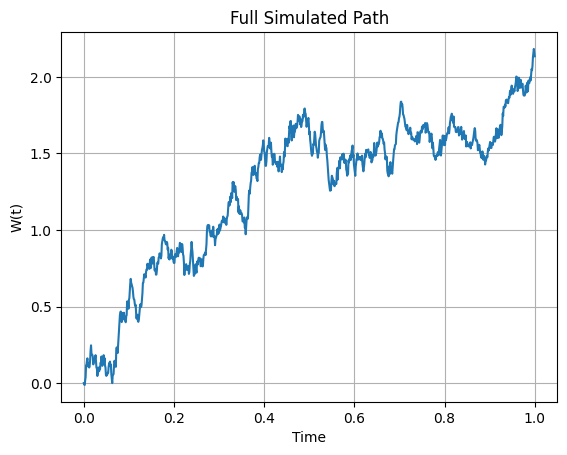

In [9]:
# Question 1:

import numpy as np

def simulate_wiener_process(T, num_steps):
  dt = T / num_steps
  # increments
  increments = np.random.normal(loc=0, scale=np.sqrt(dt), size=num_steps)
  # summing increments and starting from 0
  path = np.cumsum(increments)
  path = np.insert(path, 0, 0)  # starting point
  return path

# application
T = 1.0
num_steps = 1000
wiener_path = simulate_wiener_process(T, num_steps)

# plot
import matplotlib.pyplot as plt
time_points = np.linspace(0, T, num_steps + 1)
plt.plot(time_points, wiener_path)
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.title('Full Simulated Path')
plt.grid(True)
plt.show()

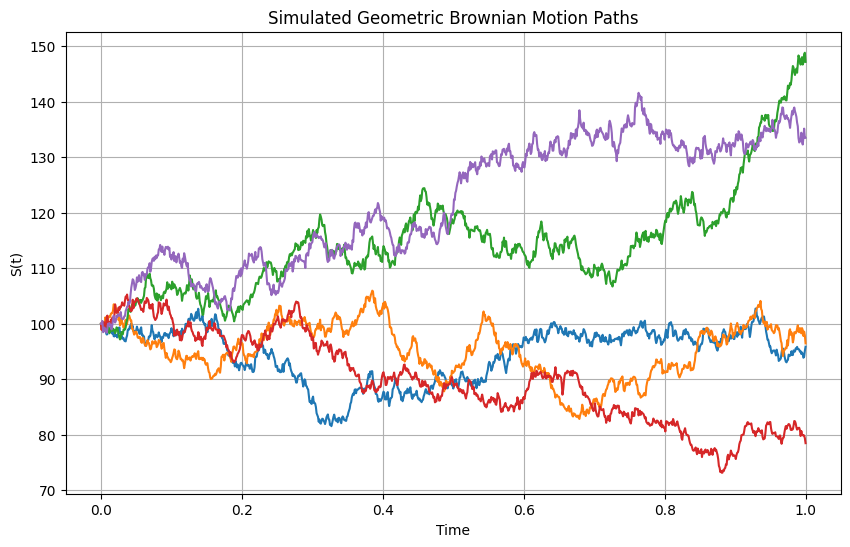

In [18]:
# Question 2:

def geo_brownian_motion(S0, alpha, sigma, T, num_steps, num_paths):
  dt = T / num_steps
  time_points = np.linspace(0, T, num_steps + 1)
  paths = []
  for _ in range(num_paths):
    wiener_increments = np.random.normal(loc=0, scale=np.sqrt(dt), size=num_steps)
    wiener_path = np.cumsum(wiener_increments)
    wiener_path = np.insert(wiener_path, 0, 0) # start at 0

    gbm_path = S0 * np.exp(sigma * wiener_path + (alpha - 0.5 * sigma**2) * time_points)
    paths.append(gbm_path)
  return time_points, paths

# application
S0 = 100  # initial stock price
alpha = 0.05  # drift
sigma = 0.2  # volatility
T = 1.0  # time horizon
num_steps = 1000  # number of steps
num_paths = 5  # number of paths to simulate

time_points, gbm_paths = geo_brownian_motion(S0, alpha, sigma, T, num_steps, num_paths)

# plot
plt.figure(figsize=(10, 6))
for path in gbm_paths:
  plt.plot(time_points, path)

plt.xlabel('Time')
plt.ylabel('S(t)')
plt.title('Simulated Geometric Brownian Motion Paths')
plt.grid(True)
plt.show()

In [25]:
# Question 3:

def expected_covariance(num_simulations, T, num_steps):
  dt = T / num_steps
  time_points = np.linspace(0, T, num_steps + 1)
  covariances = {}

  # choosing few pairs of s and t
  s_values = [0.2 * T, 0.5 * T, 0.8 * T]
  t_values = [0.3 * T, 0.6 * T, 0.9 * T]

  for s in s_values:
    for t in t_values:
      s_index = int(s / dt)
      t_index = int(t / dt)
      products = []
      for _ in range(num_simulations):
        increments = np.random.normal(loc=0, scale=np.sqrt(dt), size=num_steps)
        path = np.cumsum(increments)
        path = np.insert(path, 0, 0)
        products.append(path[s_index] * path[t_index])

      estimated_covariance = np.mean(products)
      covariances[(s, t)] = estimated_covariance
      print(f"Estimated E[W({s:.2f})W({t:.2f})] = {estimated_covariance:.4f}")
      print(f"min({s:.2f}, {t:.2f}) = {min(s, t):.4f}\n")

  return covariances

# application
num_simulations = 10000
T = 1.0
num_steps = 1000
estimated_covariances = expected_covariance(num_simulations, T, num_steps)

Estimated E[W(0.20)W(0.30)] = 0.2028
min(0.20, 0.30) = 0.2000

Estimated E[W(0.20)W(0.60)] = 0.1970
min(0.20, 0.60) = 0.2000

Estimated E[W(0.20)W(0.90)] = 0.1893
min(0.20, 0.90) = 0.2000

Estimated E[W(0.50)W(0.30)] = 0.3022
min(0.50, 0.30) = 0.3000

Estimated E[W(0.50)W(0.60)] = 0.4972
min(0.50, 0.60) = 0.5000

Estimated E[W(0.50)W(0.90)] = 0.4950
min(0.50, 0.90) = 0.5000

Estimated E[W(0.80)W(0.30)] = 0.3013
min(0.80, 0.30) = 0.3000

Estimated E[W(0.80)W(0.60)] = 0.6028
min(0.80, 0.60) = 0.6000

Estimated E[W(0.80)W(0.90)] = 0.7872
min(0.80, 0.90) = 0.8000



In [24]:
# Question 4:

def increment_prop(T, num_steps, num_simulations, s, t):
  dt = T / num_steps
  s_index = int(s / dt)
  t_index = int(t / dt)

  # check if s < t
  if s_index >= t_index:
      print(f"Error: s ({s}) must be less than t ({t}).")
      return

  increments_Wt_minus_Ws = []
  increment_interval1 = []
  increment_interval2 = []

  # let us define two non-overlapping intervals for independence check
  # let us pick an interval [a, b] and [c, d] such that b < c.
  a = 0.1 * T
  b = 0.2 * T
  c = 0.4 * T
  d = 0.5 * T

  a_index = int(a / dt)
  b_index = int(b / dt)
  c_index = int(c / dt)
  d_index = int(d / dt)

  # check if intervals are non-overlapping
  if b_index >= c_index:
      print(f"Error: Chosen intervals [{a}, {b}] and [{c}, {d}] are not non-overlapping.")
      return

  for _ in range(num_simulations):
    increments = np.random.normal(loc=0, scale=np.sqrt(dt), size=num_steps)
    path = np.cumsum(increments)
    path = np.insert(path, 0, 0) # start at 0

    # Wt - Ws
    increment = path[t_index] - path[s_index]
    increments_Wt_minus_Ws.append(increment)

    # increment for the first interval
    increment1 = path[b_index] - path[a_index]
    increment_interval1.append(increment1)

    # increment for the second interval
    increment2 = path[d_index] - path[c_index]
    increment_interval2.append(increment2)

  # verify mean and variance of Wt - Ws
  mean_increment = np.mean(increments_Wt_minus_Ws)
  variance_increment = np.var(increments_Wt_minus_Ws)
  expected_variance = t - s

  print(f"\nVerification for W({t:.2f}) - W({s:.2f}):")
  print(f"  Simulated Mean: {mean_increment:.4f}")
  print(f"  Expected Mean: 0")
  print(f"  Simulated Variance: {variance_increment:.4f}")
  print(f"  Expected Variance (t - s): {expected_variance:.4f}")

  # verify independence of increments over non-overlapping intervals
  ## Independence implies that the covariance is close to zero.
  covariance_non_overlapping_increments = np.cov(increment_interval1, increment_interval2)[0, 1]

  print(f"\nVerification for independence of increments:")
  print(f"  Interval 1: W({b:.2f}) - W({a:.2f})")
  print(f"  Interval 2: W({d:.2f}) - W({c:.2f})")
  print(f"  Simulated Covariance: {covariance_non_overlapping_increments:.4f}")
  print(f"  Expected Covariance (for independent variables): 0")

# application
T = 1.0
num_steps = 1000
num_simulations = 10000
s_test = 0.3 * T
t_test = 0.7 * T

increment_prop(T, num_steps, num_simulations, s_test, t_test)


Verification for W(0.70) - W(0.30):
  Simulated Mean: 0.0020
  Expected Mean: 0
  Simulated Variance: 0.3917
  Expected Variance (t - s): 0.4000

Verification for independence of increments:
  Interval 1: W(0.20) - W(0.10)
  Interval 2: W(0.50) - W(0.40)
  Simulated Covariance: -0.0008
  Expected Covariance (for independent variables): 0


# Question 5:

To show E[Wt|Fs] = Ws for s <= t, we can reason about the properties
of Brownian motion.

Wt = Ws + (Wt - Ws)

The increment Wt - Ws is independent of Fs (the information up to time s).
Therefore, E[Wt - Ws | Fs] = E[Wt - Ws].
The expected value of a Brownian motion increment is 0, i.e., E[Wt - Ws] = 0.

So, E[Wt - Ws | Fs] = 0.

E[Wt | Fs] = E[Ws + (Wt - Ws) | Fs]

By linearity of conditional expectation and since Ws is Fs-measurable (i.e., Ws is known at time s):
E[Ws + (Wt - Ws) | Fs] = E[Ws | Fs] + E[Wt - Ws | Fs]
                     = Ws + 0
                     = Ws
Thus, E[Wt | Fs] = Ws for s <= t.

A stochastic process Xt is a martingale with respect to a filtration F_t if:
  1. E[|Xt|] < infinity for all t
  2. Xt is F_t-measurable for all t
  3. E[Xt | Fs] = Xs for all s <= t

 For standard Brownian motion Wt:
 1. E[|Wt|] = E[|N(0, t)|] = sqrt(2t/pi), which is finite for all t >= 0.
 2. Wt is F_t-measurable by definition of the natural filtration of Brownian motion.
 3. We have just shown that E[Wt | Fs] = Ws for all s <= t.

Therefore, Brownian motion satisfies all three conditions and is a martingale.